In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
import scipy.special as sf
%matplotlib notebook


In [2]:
df = pd.read_csv('Zee_Run2011A.csv')

m_inv = np.sqrt(2*df.pt1 * df.pt2*(np.cosh(df.eta1 - df.eta2) - np.cos(df.phi1 - df.phi2)))
df['M'] = m_inv

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run           18885 non-null  int64  
 1   Event         18885 non-null  int64  
 2   pt1           18885 non-null  float64
 3   eta1          18885 non-null  float64
 4   phi1          18885 non-null  float64
 5   Q1            18885 non-null  int64  
 6   type1         18885 non-null  object 
 7   sigmaEtaEta1  18885 non-null  float64
 8   HoverE1       18885 non-null  float64
 9   isoTrack1     18885 non-null  float64
 10  isoEcal1      18885 non-null  float64
 11  isoHcal1      18885 non-null  float64
 12  pt2           18885 non-null  float64
 13  eta2          18885 non-null  float64
 14  phi2          18885 non-null  float64
 15  Q2            18885 non-null  int64  
 16  type2         18885 non-null  object 
 17  sigmaEtaEta2  18885 non-null  float64
 18  HoverE2       18885 non-nu

<IPython.core.display.Javascript object>


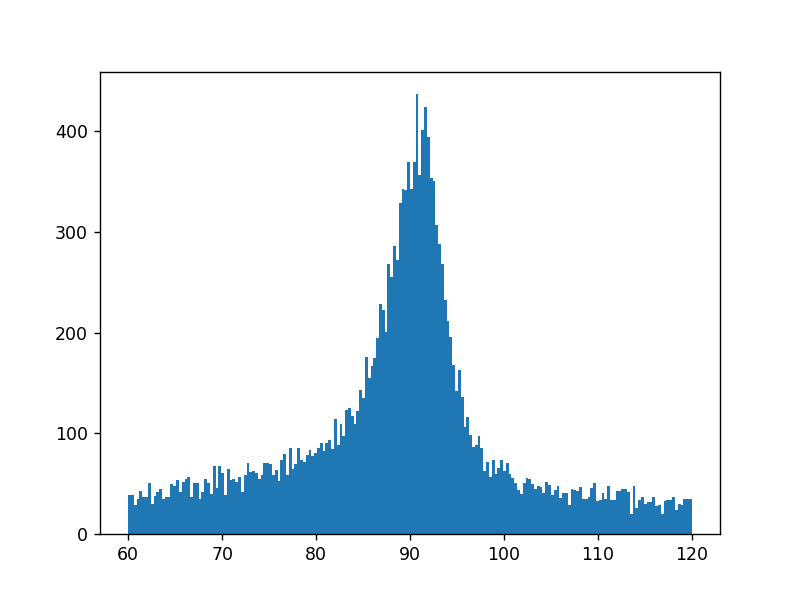

In [3]:
fig = plt.figure()
plt.hist(m_inv,bins=200);

In [4]:
def breit(E, gamma, M, a, b, A):
    
    little_gamma = np.sqrt(M**2*(M**2 + gamma**2))
    k = 2*np.sqrt(2)*M*gamma*little_gamma/(np.pi*np.sqrt(M**2 + little_gamma))
    
    return a*E + b + A*(k/((E**2 - M**2)**2 + M**2 * gamma**2))

<IPython.core.display.Javascript object>


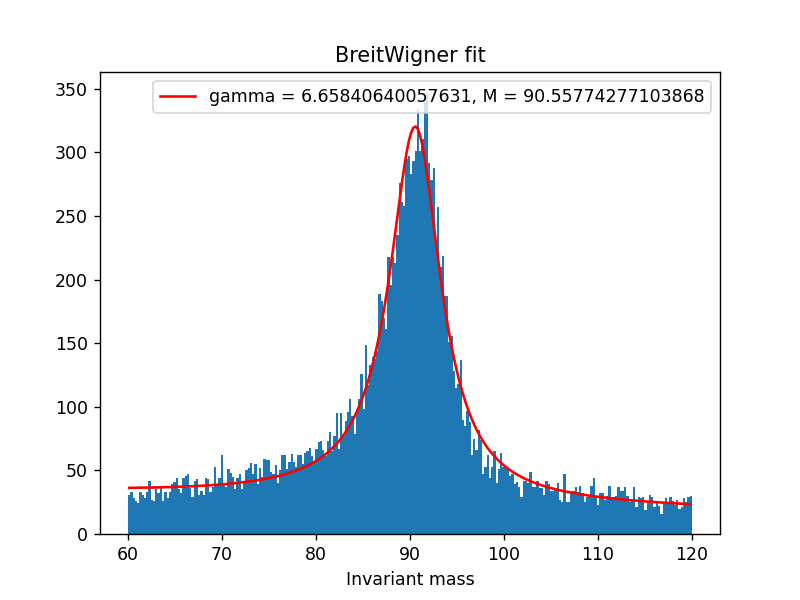

In [18]:
lowlim = 60
uplim = 120
bins = 250

fig = plt.figure()
h_mu = plt.hist(m_inv, bins=bins, range=(lowlim,uplim))

y_mu = h_mu[0] 
x_mu = 0.5*( h_mu[1][0:-1] + h_mu[1][1:] ) 
y_mu_error = np.sqrt(y_mu)
for i in range (len(y_mu)):
    if y_mu_error[i] == 0:
        y_mu_error[i] = 1.0
    else:
        y_mu_error[i] = y_mu_error[i]

initials = [26,92,-25, 20, 13000]
best_mu, covariance_mu = curve_fit(breit, x_mu, y_mu, p0=initials, sigma=y_mu_error)
error_mu = np.sqrt(np.diag(covariance_mu))        

plt.plot(x_mu, breit(x_mu, *best_mu), 'r-', label='gamma = {}, M = {}'.format(best_mu[0], best_mu[1]))
plt.xlabel('Invariant mass')
plt.title('BreitWigner fit')
plt.legend();

In [37]:
chisq = np.sum( (y_mu - breit(x_mu,*best_mu))**2/y_mu_error**2)
dof = len(x_mu) - len(best_mu) - 1

p = sf.gammaincc(dof/2.0, chisq/2.0)

print(' chi2 = ',chisq,'\n reduced chi2 = ', chisq/dof, '\n p = ',p)

 chi2 =  401.31243685553454 
 reduced chi2 =  1.6447231018669448 
 p =  8.673321759370304e-10


<IPython.core.display.Javascript object>


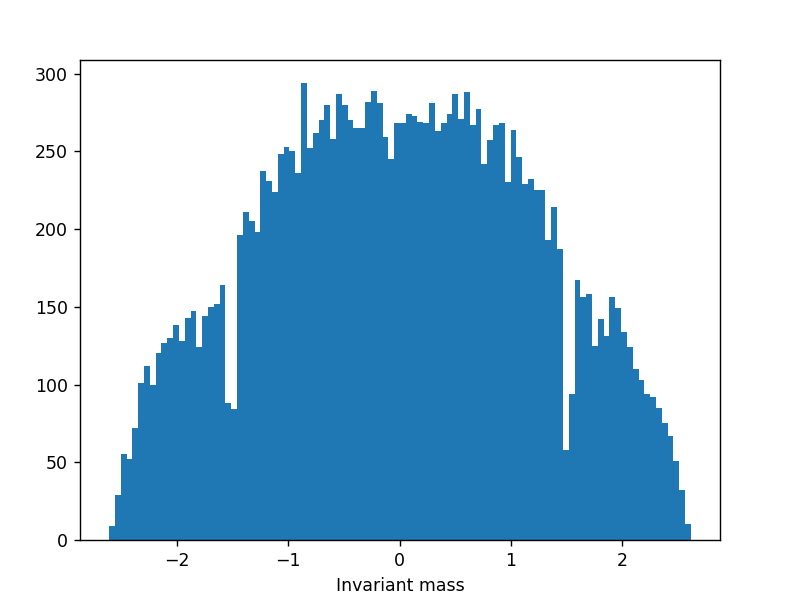

In [6]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.hist(df.eta1,bins = 100)


ax.set_xlabel('Invariant mass');


<IPython.core.display.Javascript object>


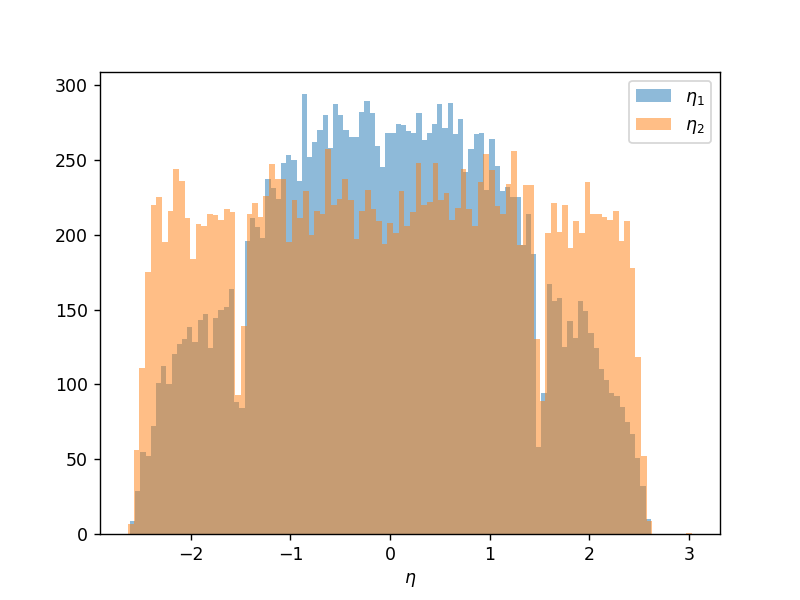

In [7]:
fig = plt.figure()
plt.hist(df.eta1,bins = 100,alpha = .5, label =r'$\eta_1$')
plt.hist(df.eta2,bins = 100,alpha = .5, label = r'$\eta_2$')
plt.xlabel(r'$\eta$')
plt.legend();

In [8]:
barrel = df[(df['type1']=='EB') & (df['type2']=='EB')]

endcap = df[(df['type1']=='EE') & (df['type2']=='EE')]

<IPython.core.display.Javascript object>


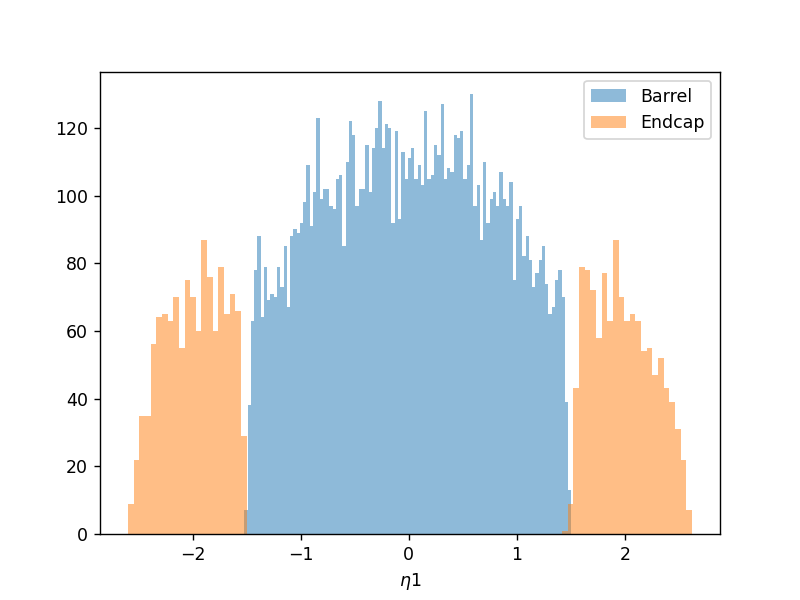

In [9]:
fig = plt.figure()
plt.hist(barrel.eta1,bins = 100,alpha = 0.5, label =r'Barrel')
plt.hist(endcap.eta1,bins = 100,alpha = 0.5, label = r'Endcap')
plt.xlabel(r'$\eta1$')
plt.legend();

<IPython.core.display.Javascript object>


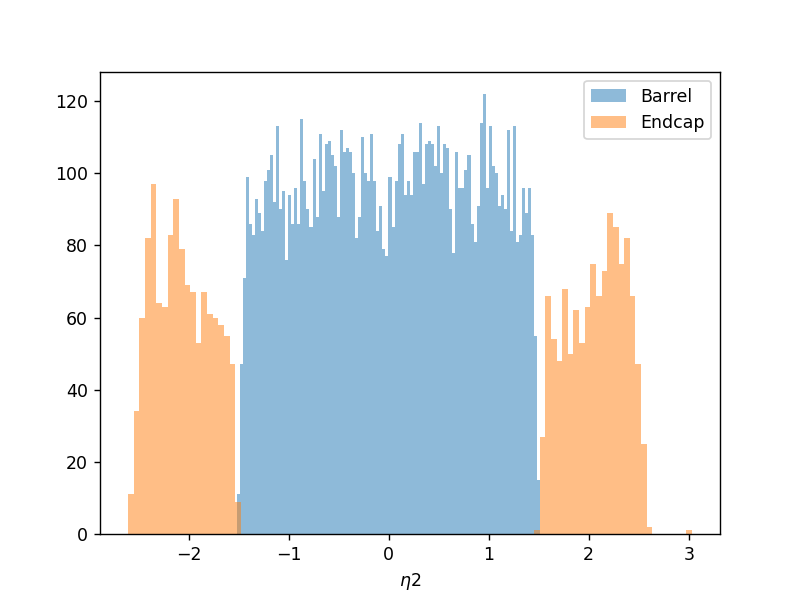

In [10]:
fig = plt.figure()
plt.hist(barrel.eta2,bins = 100,alpha = 0.5, label =r'Barrel')
plt.hist(endcap.eta2,bins = 100,alpha = 0.5, label = r'Endcap')
plt.xlabel(r'$\eta2$')
plt.legend();

<IPython.core.display.Javascript object>


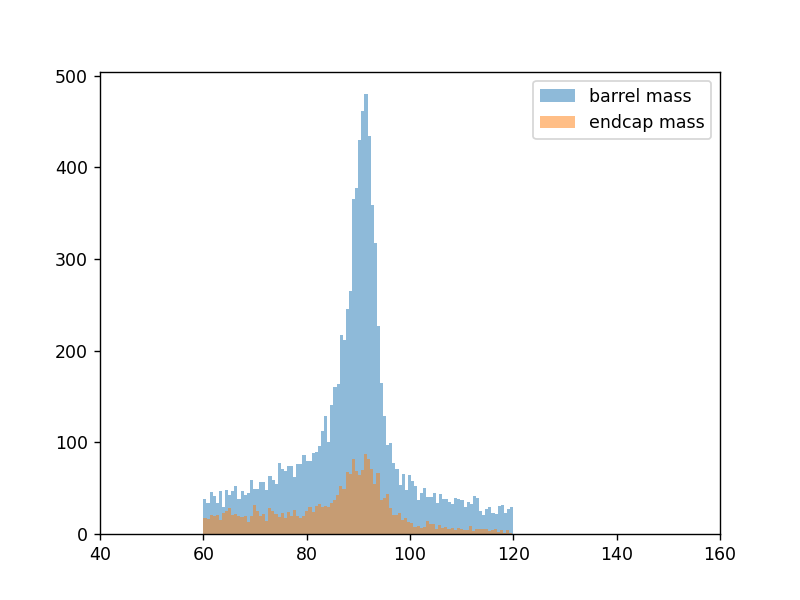

In [11]:
fig = plt.figure()
plt.hist(barrel.M,bins = 100,alpha = .5, label = 'barrel mass')
plt.hist(endcap.M,bins = 100,alpha = .5, label = 'endcap mass')
plt.xlim([40, 160])

plt.legend();

In [12]:
print(np.std(barrel.M))

print(np.std(endcap.M))

11.488508465840878
12.226643646452962


In [13]:
d1 = df.copy()

In [14]:
d1.drop(['Run','Event', 'Q1', 'type1', 'sigmaEtaEta1', 'HoverE1', 'isoTrack1', 'isoEcal1', 'isoHcal1', 'Q2', 'type2', 'sigmaEtaEta2', 'HoverE2', 'isoTrack2', 'isoEcal1', 'isoHcal2'],axis=1,inplace = True)                           

In [15]:
d1.corr()

,pt1,eta1,phi1,pt2,eta2,phi2,isoEcal2,M
pt1,1.000000,-0.005495,-0.000376,-0.068503,-0.009661,-0.000184,0.090173,0.279797
eta1,-0.005495,1.000000,0.015935,0.009975,0.665429,-0.022004,-0.006334,0.010426
phi1,-0.000376,0.015935,1.000000,0.000893,0.007323,-0.460515,-0.001939,-0.000727
pt2,-0.068503,0.009975,0.000893,1.000000,0.010027,-0.000399,0.008491,0.342749
eta2,-0.009661,0.665429,0.007323,0.010027,1.000000,-0.023955,-0.005884,0.002616
phi2,-0.000184,-0.022004,-0.460515,-0.000399,-0.023955,1.000000,-0.009822,-0.015139
isoEcal2,0.090173,-0.006334,-0.001939,0.008491,-0.005884,-0.009822,1.000000,0.028182
M,0.279797,0.010426,-0.000727,0.342749,0.002616,-0.015139,0.028182,1.000000


In [16]:
"eta1 and eta2 have the strongest correlation"

'eta1 and eta2 have the strongest correlation'